In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
customer_attr = pd.read_csv("customer_data_2014-15_attr.csv")
customer_visits = pd.read_csv('customer_data_2015_visited.csv')
customer_transactions = pd.read_csv('customer_data3_2015_transactions.csv')

#There is a difference in unique customer count for transactions_data(count = 437323) and visists data (count = 500000)

In [114]:
#Merging customer attributes and visits
customer_attr = customer_attr.rename(columns = {'CustomerId':'CustomerID'})
init_result = pd.merge(customer_attr, customer_visits, on='CustomerID')
init_result.head()

,CustomerID,Age,CustomerSince,Gender,Region,Visits
0,500001,59,2012,F,East,36
1,500002,26,2013,M,East,32
2,500003,28,2013,F,West,43
3,500004,31,2015,M,West,33
4,500005,28,2013,F,South,42


In [115]:
#Tuning transactions data

#Converting transactionDate 
customer_transactions['transactionDate'] = pd.to_datetime(customer_transactions['transactionDate'])
customer_transactions.head()

,transactionID,Spends,CustomerID,transactionDate
0,1000001,16,843140,2015-01-01
1,1000002,31,697698,2015-01-01
2,1000003,27,746282,2015-01-01
3,1000004,28,645145,2015-01-01
4,1000005,22,766577,2015-01-01


In [116]:
customer_transactions['transactionMonth'] = customer_transactions['transactionDate'].dt.month

In [117]:
customer_transactions.head()
group_month = customer_transactions.groupby(['transactionMonth']).sum()
group_month = group_month.drop(['CustomerID', 'transactionID'], axis = 'columns')


#.hist(group_month['transactionMonth'].values)

In [118]:
customer_transactions.head()

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,1
1,1000002,31,697698,2015-01-01,1
2,1000003,27,746282,2015-01-01,1
3,1000004,28,645145,2015-01-01,1
4,1000005,22,766577,2015-01-01,1


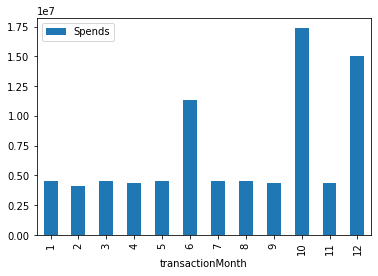

In [119]:
group_month.plot(kind='bar')

In [120]:
#From this histogram we assume that monts (6, 10, 12) are offer months
customer_transactions.head()

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,1
1,1000002,31,697698,2015-01-01,1
2,1000003,27,746282,2015-01-01,1
3,1000004,28,645145,2015-01-01,1
4,1000005,22,766577,2015-01-01,1


In [121]:
print(customer_transactions.dtypes)
temp_ct = pd.DataFrame(customer_transactions).copy()
temp_ct.head()

transactionID                int64
Spends                       int64
CustomerID                   int64
transactionDate     datetime64[ns]
transactionMonth             int64
dtype: object


,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,1
1,1000002,31,697698,2015-01-01,1
2,1000003,27,746282,2015-01-01,1
3,1000004,28,645145,2015-01-01,1
4,1000005,22,766577,2015-01-01,1


In [122]:
# def offer_status(df, column):    
#     for index, row in df.iterrows():
#         df['offer_month_status'] = ((row[column] == 6) | (row[column] == 10) |(row[column] == 12))
        
# temp_ct.head()

offer_list = [6, 10, 12]

def offer_status(df, column):
    for i in range(1,13):
        if i in offer_list:
            temp_ct['transactionMonth'][temp_ct['transactionMonth'] == i] = 'Offer_Month'
        else:
            temp_ct['transactionMonth'][temp_ct['transactionMonth'] == i] = 'Non_Offer_Month'

In [123]:
offer_status(temp_ct, 'transactionMonth')

/Users/mounica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
offer_df= temp_ct.copy()

In [152]:
offer_df['CustomerID'].nunique()

437323

In [125]:
# print(temp_ct['CustomerID'].value_counts())
temp_ct[temp_ct['CustomerID']==502005]

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
2080382,3080383,88,502005,2015-10-10,Offer_Month


In [128]:
# off_cond = init_result['CustomerID'].isin(offer_df['CustomerID'])
# # y = offer_df[offer_df['transactionID'] == offer_df_avg['lastTransID'] ]

# off_x = init_result[off_cond].copy()

# #Customers attribute table - who purchased in offer month
# off_x.shape
#off_x.head()

#getting the customer Ids of customers on offer months

(382329, 6)

In [129]:
#Fetching non-offer month values
nonOff_df = temp_ct.groupby(['transactionMonth']).get_group('Non_Offer_Month')
nonOff_df = pd.DataFrame(nonOff_df).copy()

In [130]:
print(customer_transactions['CustomerID'].nunique())
print(nonOff_df['CustomerID'].nunique())
print(nonOff_df.shape)
nonOff_df.head()

437323
374840
(1359082, 5)


,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,Non_Offer_Month
1,1000002,31,697698,2015-01-01,Non_Offer_Month
2,1000003,27,746282,2015-01-01,Non_Offer_Month
3,1000004,28,645145,2015-01-01,Non_Offer_Month
4,1000005,22,766577,2015-01-01,Non_Offer_Month


In [131]:
#Making a copy of all transactions happend in offer months
offer_df_copy = offer_df.copy()

#Fetching last transactions of all customers
offer_df_latest = offer_df.groupby(['CustomerID'])['transactionID'].max()
# offer_df_avg = offer_df.loc[offer_df.reset_index().groupby(['CustomerID'])['transactionID'].idxmax()]
offer_df_latest
offer_df_latest = pd.DataFrame(offer_df_latest).copy()
offer_df_latest = offer_df_latest.sort_index()
offer_df_latest = offer_df_latest.rename(columns={'transactionID':'lastTransID'})
offer_df_latest['CustomerID'] = offer_df_latest.index
print(offer_df_latest['CustomerID'].nunique())
print(offer_df_latest.shape)
print(offer_df_copy.shape)
offer_df_latest.head()


382329
(382329, 2)
(1485350, 5)


,lastTransID,CustomerID
CustomerID,,
500001,3754483,500001
500002,3593302,500002
500004,3791230,500004
500006,3691650,500006
500009,3830338,500009


In [132]:
#Checking last transaction in whole transactions of offer-month
cond = offer_df['transactionID'].isin(offer_df_latest['lastTransID'])

#Saving entire row of customer last transaction into 'y'
y = offer_df[cond]

#Droping last transaction rows from entire offer-month transactions
offer_df.drop(offer_df[cond].index, inplace = True)

offer_df['CustomerID'].nunique()

300253

In [133]:
y.head()

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
752112,1752113,88,983734,2015-06-01,Offer_Month
752123,1752124,31,717744,2015-06-01,Offer_Month
752142,1752143,103,942794,2015-06-01,Offer_Month
752158,1752159,75,528543,2015-06-01,Offer_Month
752159,1752160,108,757247,2015-06-01,Offer_Month


In [134]:
#maximum spends of each customer after deleting last-transaction
temp_off_df_max = offer_df.groupby(['CustomerID'])['Spends'].max()
temp_off_df_max = pd.DataFrame(temp_off_df_max).copy()
temp_off_df_max = temp_off_df_max.sort_index()
temp_off_df_max = temp_off_df_max.rename(columns={'Spends':'Max_Spendings'})
temp_off_df_max['CustomerID'] = temp_off_df_max.index
temp_off_df_max.head()

,Max_Spendings,CustomerID
CustomerID,,
500001,40,500001
500002,31,500002
500004,33,500004
500009,31,500009
500010,34,500010


In [135]:
#offer_df[offer_df['CustomerID']==500002]

offer_df[offer_df['CustomerID']==500001]

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
866066,1866067,40,500001,2015-06-20,Offer_Month
2063155,3063156,39,500001,2015-10-10,Offer_Month


In [143]:
from datetime import date

today = pd.to_datetime(date.today())

#offer_df['New_column'] =
print(abs(y[0:5]['transactionDate']-today))

print(y.head())


# def f(row):
#     if row[‘date’] > 201110:
#         val = 5
#     elif row[‘date’] <= 201110 and row[‘date’] > 201108:
#         val = 4
#     elif row[‘date’] <= 201108 and row[‘date’] > 201106:
#         val = 3
#     elif row[‘date’] <= 201106 and row[‘date’] > 201104:
#         val = 2
#     else:
#         val = 1
#     return val

752112   1759 days
752123   1759 days
752142   1759 days
752158   1759 days
752159   1759 days
Name: transactionDate, dtype: timedelta64[ns]
        transactionID  Spends  CustomerID transactionDate transactionMonth
752112        1752113      88      983734      2015-06-01      Offer_Month
752123        1752124      31      717744      2015-06-01      Offer_Month
752142        1752143     103      942794      2015-06-01      Offer_Month
752158        1752159      75      528543      2015-06-01      Offer_Month
752159        1752160     108      757247      2015-06-01      Offer_Month


In [78]:
#minimum spends of each customer after deleting last-transaction
temp_off_df_min = offer_df.groupby(['CustomerID'])['Spends'].min()
temp_off_df_min = pd.DataFrame(temp_off_df_min).copy()
temp_off_df_min = temp_off_df_min.sort_index()
temp_off_df_min = temp_off_df_min.rename(columns={'Spends':'Min_Spendings'})
temp_off_df_min['CustomerID'] = temp_off_df_min.index
temp_off_df_min.head()

,Min_Spendings,CustomerID
CustomerID,,
500001,39,500001
500002,21,500002
500004,20,500004
500009,30,500009
500010,17,500010


In [79]:
#Averaging spends of each customer after deleting last-transaction
temp_off_df = offer_df.groupby(['CustomerID'])['Spends'].mean()
temp_off_df = pd.DataFrame(temp_off_df).copy()
temp_off_df = temp_off_df.sort_index()
temp_off_df = temp_off_df.rename(columns={'Spends':'Avg_Spendings'})
temp_off_df['CustomerID'] = temp_off_df.index
temp_off_df.head()

,Avg_Spendings,CustomerID
CustomerID,,
500001,39.500000,500001
500002,26.333333,500002
500004,29.200000,500004
500009,30.333333,500009
500010,23.666667,500010


In [80]:
#sum spends of each customer after deleting last-transaction
temp_off_df_sum = offer_df.groupby(['CustomerID'])['Spends'].sum()
temp_off_df_sum = pd.DataFrame(temp_off_df_sum).copy()
temp_off_df_sum = temp_off_df_sum.sort_index()
temp_off_df_sum = temp_off_df_sum.rename(columns={'Spends':'Total_Spendings'})
temp_off_df_sum['CustomerID'] = temp_off_df_sum.index
temp_off_df_sum.head()

,Total_Spendings,CustomerID
CustomerID,,
500001,79,500001
500002,158,500002
500004,146,500004
500009,91,500009
500010,142,500010


In [81]:
#total number of transactions spends of each customer after deleting last-transaction
temp_off_df_total_trans = offer_df.groupby(['CustomerID'])['transactionID'].count()
temp_off_df_total_trans = pd.DataFrame(temp_off_df_total_trans).copy()
temp_off_df_total_trans = temp_off_df_total_trans.sort_index()
temp_off_df_total_trans = temp_off_df_total_trans.rename(columns={'transactionID':'Total_Transactions'})
temp_off_df_total_trans['CustomerID'] = temp_off_df_total_trans.index
temp_off_df_total_trans.head()

,Total_Transactions,CustomerID
CustomerID,,
500001,2,500001
500002,6,500002
500004,5,500004
500009,3,500009
500010,6,500010


In [82]:
#off_x is consolidated dataframe of customer(attr, visits, offermonth-trans)
#temp_off_df is average spendings of all customers excluding last-transcation
#Joining off_x and temp_off_x 
#temp_off_df is a dataframe with avg.spending of unique customers who purchased in offer-month 
temp_off_df = off_x.join(temp_off_df.set_index('CustomerID'), on='CustomerID')
temp_off_df = temp_off_df.join(temp_off_df_max.set_index('CustomerID'), on='CustomerID')
temp_off_df = temp_off_df.join(temp_off_df_min.set_index('CustomerID'), on='CustomerID')
temp_off_df = temp_off_df.join(temp_off_df_sum.set_index('CustomerID'), on='CustomerID')
temp_off_df = temp_off_df.join(temp_off_df_total_trans.set_index('CustomerID'), on='CustomerID')
#Appending value 0 for customers who did 1 transaction
#print(temp_off_df['Avg_Spendings'].mean())
temp_off_df['Avg_Spendings'] = temp_off_df['Avg_Spendings'].fillna(temp_off_df['Avg_Spendings'].mean())
temp_off_df['Max_Spendings'] = temp_off_df['Max_Spendings'].fillna(temp_off_df['Max_Spendings'].mean())
temp_off_df['Min_Spendings'] = temp_off_df['Min_Spendings'].fillna(temp_off_df['Min_Spendings'].mean())
temp_off_df['Total_Spendings'] = temp_off_df['Total_Spendings'].fillna(temp_off_df['Total_Spendings'].mean())
temp_off_df['Avg_Spendings'] = temp_off_df['Avg_Spendings'].fillna(temp_off_df['Avg_Spendings'].mean())
temp_off_df['Total_Transactions'] = temp_off_df['Total_Transactions'].fillna(temp_off_df['Total_Transactions'].mean())

temp_off_df

,CustomerID,Age,CustomerSince,Gender,Region,Visits,Avg_Spendings,Max_Spendings,Min_Spendings,Total_Spendings,Total_Transactions
0,500001,59,2012,F,East,36,39.500000,40.000000,39.000000,79.000000,2.000000
1,500002,26,2013,M,East,32,26.333333,31.000000,21.000000,158.000000,6.000000
3,500004,31,2015,M,West,33,29.200000,33.000000,20.000000,146.000000,5.000000
5,500006,58,2015,M,West,35,28.793751,33.204947,24.551072,98.642661,3.673639
8,500009,36,2013,M,West,31,30.333333,31.000000,30.000000,91.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
499992,999993,56,2013,M,East,34,30.500000,37.000000,24.000000,61.000000,2.000000
499995,999996,54,2012,M,West,22,36.000000,40.000000,32.000000,72.000000,2.000000
499996,999997,56,<2011,F,East,30,34.000000,34.000000,34.000000,34.000000,1.000000
499997,999998,59,2015,F,West,23,39.250000,47.000000,35.000000,157.000000,4.000000


In [149]:
y['Recency_days']= abs(y['transactionDate']-today)

y.tail()
    
#init_result = pd.merge(customer_attr, customer_visits, on='CustomerID')

/Users/mounica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,transactionID,Spends,CustomerID,transactionDate,transactionMonth,Recency_days
2844427,3844428,16,710852,2015-12-31,Offer_Month,1546 days
2844428,3844429,39,840213,2015-12-31,Offer_Month,1546 days
2844429,3844430,29,846884,2015-12-31,Offer_Month,1546 days
2844430,3844431,26,744646,2015-12-31,Offer_Month,1546 days
2844431,3844432,27,961948,2015-12-31,Offer_Month,1546 days


In [145]:
temp_off_df.head()

,CustomerID,Age,CustomerSince,Gender,Region,Visits,Avg_Spendings,Max_Spendings,Min_Spendings,Total_Spendings,Total_Transactions,Recency_days
0,500001,59,2012,F,East,36,39.500000,40.000000,39.000000,79.000000,2.000000,NaT
1,500002,26,2013,M,East,32,26.333333,31.000000,21.000000,158.000000,6.000000,NaT
3,500004,31,2015,M,West,33,29.200000,33.000000,20.000000,146.000000,5.000000,NaT
5,500006,58,2015,M,West,35,28.793751,33.204947,24.551072,98.642661,3.673639,NaT
8,500009,36,2013,M,West,31,30.333333,31.000000,30.000000,91.000000,3.000000,NaT


In [34]:
#dropping rows with zero total trasactions
nan_off_df = temp_off_df.copy() 

In [35]:
nan_off_df = nan_off_df.dropna()
nan_off_df.shape

(300253, 11)

In [36]:
off_x

,CustomerID,Age,CustomerSince,Gender,Region,Visits
0,500001,59,2012,F,East,36
1,500002,26,2013,M,East,32
3,500004,31,2015,M,West,33
5,500006,58,2015,M,West,35
8,500009,36,2013,M,West,31
...,...,...,...,...,...,...
499992,999993,56,2013,M,East,34
499995,999996,54,2012,M,West,22
499996,999997,56,<2011,F,East,30
499997,999998,59,2015,F,West,23


In [37]:
print(f'temp_off_df shape {nan_off_df.shape}')
print(f'y shape {y.shape}')
#y.head()



temp_off_df shape (300253, 11)
y shape (382329, 5)


In [38]:
off_spend_pred = (y[['CustomerID', 'Spends']])
off_spend_pred.head()
# y.head()

,CustomerID,Spends
752112,983734,88
752123,717744,31
752142,942794,103
752158,528543,75
752159,757247,108


In [39]:
temp_off_df = temp_off_df.join(off_spend_pred.set_index('CustomerID'), on='CustomerID')
temp_off_df = temp_off_df.rename(columns={'Spends':'Exp_Spend'})
temp_off_df.shape

(382329, 12)

In [40]:
temp_off_df.head()

,CustomerID,Age,CustomerSince,Gender,Region,Visits,Avg_Spendings,Max_Spendings,Min_Spendings,Total_Spendings,Total_Transactions,Exp_Spend
0,500001,59,2012,F,East,36,39.500000,40.0,39.0,79.0,2.0,31
1,500002,26,2013,M,East,32,26.333333,31.0,21.0,158.0,6.0,19
3,500004,31,2015,M,West,33,29.200000,33.0,20.0,146.0,5.0,33
5,500006,58,2015,M,West,35,NaN,NaN,NaN,NaN,NaN,49
8,500009,36,2013,M,West,31,30.333333,31.0,30.0,91.0,3.0,30


In [41]:
#Converting categorical data
def encode(column, dataframe):
    one_hot = pd.get_dummies(dataframe[column])
    dataframe = dataframe.drop(column,axis = 1)
    dataframe = dataframe.join(one_hot)
    return dataframe

In [42]:
temp_off_df = encode('Gender', temp_off_df)
temp_off_df = encode('Region', temp_off_df)


In [43]:
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '<2011'] = 5
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2015'] = 1
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2014'] = 2
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2013'] = 3
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2012'] = 4

/Users/mounica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mounica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mounica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is s

In [44]:
temp_off_df=temp_off_df.round(decimals=2)
temp_off_df.head()

,CustomerID,Age,CustomerSince,Visits,Avg_Spendings,Max_Spendings,Min_Spendings,Total_Spendings,Total_Transactions,Exp_Spend,F,M,East,North,South,West
0,500001,59,4,36,39.50,40.0,39.0,79.0,2.0,31,1,0,1,0,0,0
1,500002,26,3,32,26.33,31.0,21.0,158.0,6.0,19,0,1,1,0,0,0
3,500004,31,1,33,29.20,33.0,20.0,146.0,5.0,33,0,1,0,0,0,1
5,500006,58,1,35,NaN,NaN,NaN,NaN,NaN,49,0,1,0,0,0,1
8,500009,36,3,31,30.33,31.0,30.0,91.0,3.0,30,0,1,0,0,0,1


In [100]:
off_df['CustomerID'].nunique()

NameError: name 'off_df' is not defined

In [45]:
#Separating independent and dependent variable from offer-month dataframe(temp_off_df)
X_off = temp_off_df.drop(['CustomerID', 'Exp_Spend'], axis = 1).values
Y_off = temp_off_df['Exp_Spend'].values

In [46]:
X_off

array([[59, 4, 36, ..., 0, 0, 0],
       [26, 3, 32, ..., 0, 0, 0],
       [31, 1, 33, ..., 0, 0, 1],
       ...,
       [56, 5, 30, ..., 0, 0, 0],
       [59, 1, 23, ..., 0, 0, 1],
       [40, 1, 29, ..., 0, 1, 0]], dtype=object)

In [47]:
#temp_off_df.isnull().sum()
temp_off_df.columns[temp_off_df.isnull().sum()>0]

Index(['Avg_Spendings', 'Max_Spendings', 'Min_Spendings', 'Total_Spendings',
       'Total_Transactions'],
      dtype='object')

In [48]:
X_off

array([[59, 4, 36, ..., 0, 0, 0],
       [26, 3, 32, ..., 0, 0, 0],
       [31, 1, 33, ..., 0, 0, 1],
       ...,
       [56, 5, 30, ..., 0, 0, 0],
       [59, 1, 23, ..., 0, 0, 1],
       [40, 1, 29, ..., 0, 1, 0]], dtype=object)

In [184]:
#Splitting test and train data for offer-month dataframe
from sklearn.model_selection import train_test_split
X_off_train, X_off_test, y_off_train, y_off_test = train_test_split(X_off, Y_off, test_size=0.1, random_state=42)

In [185]:
#Implementing feature_scaling for independent variables
from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_off = sc_X.fit_transform(X_off_train)
# independent_test = sc_X.transform(independent_test)

In [186]:
#Applying Multiple Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_off_train, y_off_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
model.fit(X_off_train, y_off_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [195]:
y_off_pred = model.predict(X_off_test)

In [196]:
print(y_off_pred[:10])
y_off_test[:10]

[19.         25.         50.41666667 27.         43.         30.
 56.         69.16129032 30.         82.75      ]


array([22, 27, 85, 54, 47, 17, 33, 69, 28, 64])

In [187]:
#predicting values for X test data
y_off_pred = regressor.predict(X_off_test)

In [193]:
print(y_off_pred[:10])
y_off_test[:10]

[35.20073333 40.11478528 44.2518863  40.59802379 61.73102007 35.60262969
 65.75804551 54.93418247 34.69065332 39.4261971 ]


array([22, 27, 85, 54, 47, 17, 33, 69, 28, 64])

In [197]:
#Checking accuracy
# from sklearn.metrics import accuracy_score
# accuracy_score(X_off_test, y_off_pred)
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_off_test, y_off_pred)

167.23953241686814

In [200]:
#import xgboost
!pip install xgboost
from xgboost.sklearn import XGBRegressor

     |████████████████████████████████| 829kB 1.6MB/s eta 0:00:01
  Created wheel for xgboost: filename=xgboost-1.0.2-cp37-cp37m-macosx_10_9_x86_64.whl size=3419084 sha256=54e958556c2e9c68326587a88f2e37660ac5a7e51082c0b0ff6f276cc79f47e0
  Stored in directory: /Users/mounica/Library/Caches/pip/wheels/2d/88/a6/eae5e2f880d228c2e8c057a2b166a05306f41e1ceaa2a01b45
Successfully built xgboost


In [247]:
model_xgb =XGBRegressor()
model_xgb.fit(X_off_train, y_off_train)
y_off_pred = model_xgb.predict(X_off_test)
print(y_off_pred[:10])
y_off_test[:10]

[25.15566  25.638315 68.20043  36.52207  41.783318 25.495071 45.308414
 71.60938  25.157457 64.695915]


array([22, 27, 85, 54, 47, 17, 33, 69, 28, 64])

In [248]:
mean_squared_error(y_off_test, y_off_pred)

122.97698885592213

In [203]:
from sklearn.ensemble import RandomForestRegressor
model_rf =RandomForestRegressor()
model_rf.fit(X_off_train, y_off_train)
y_off_pred = model_rf.predict(X_off_test)
print(y_off_pred[:10])
y_off_test[:10]

/Users/mounica/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[20.2        24.5        50.22901016 37.         43.2        25.4
 49.5        68.63952957 27.3        76.18666667]


array([22, 27, 85, 54, 47, 17, 33, 69, 28, 64])

In [204]:
mean_squared_error(y_off_test, y_off_pred)

138.26048449195727

In [ ]:
#Building optimal Backward Elimination
#Adding X0 = 1, by creating a new column for X
X_off = np.append(arr = np.ones((382329, 1)).astype(int), values = X_off, axis =1)
X_Opt_off = X_off[:, [0, 1, 2, 3, 4]]
X_Opt_off = np.array(X_Opt_off, dtype=float)

In [ ]:
#fitting backward elimination step1 to regressor
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y_off, exog = X_Opt_off).fit()
regressor_OLS.summary()

In [ ]:
X_Opt_off = X_off[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
X_Opt_off = np.array(X_Opt_off, dtype=float)
#fitting backward elimination step1 to regressor
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y_off, exog = X_Opt_off).fit()
regressor_OLS.summary()

In [244]:
from sklearn.metrics import r2_score

In [249]:
r2_score(y_off_test, y_off_pred)

0.6959268198259503